In [1]:
import pandas as pd

df= pd.read_csv('final/AIS_file_01.csv')


In [2]:
df.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
0,316048178,2022-07-31T00:19:15,49.29494,-123.01942,17.4,265.9,511.0,FASTNET,NaN,NaN,37.0,NaN,7.0,2.0,NaN,NaN,B
1,316048178,2022-07-31T00:20:31,49.29547,-123.02952,21.3,280.8,511.0,FASTNET,NaN,NaN,37.0,NaN,7.0,2.0,NaN,NaN,B
2,368234360,2022-07-31T01:22:16,49.29778,-123.06112,11.7,97.3,511.0,ONE SHOT,NaN,WDM7473,37.0,NaN,27.0,7.0,NaN,NaN,B
3,368234360,2022-07-31T01:23:17,49.29739,-123.05597,12.1,96.4,511.0,ONE SHOT,NaN,WDM7473,37.0,NaN,27.0,7.0,NaN,NaN,B
4,368234360,2022-07-31T01:24:18,49.29709,-123.05140,7.4,95.4,511.0,ONE SHOT,NaN,WDM7473,37.0,NaN,27.0,7.0,NaN,NaN,B


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335401 entries, 0 to 6335400
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   MMSI              int64  
 1   BaseDateTime      object 
 2   LAT               float64
 3   LON               float64
 4   SOG               float64
 5   COG               float64
 6   Heading           float64
 7   VesselName        object 
 8   IMO               object 
 9   CallSign          object 
 10  VesselType        float64
 11  Status            float64
 12  Length            float64
 13  Width             float64
 14  Draft             float64
 15  Cargo             float64
 16  TransceiverClass  object 
dtypes: float64(11), int64(1), object(5)
memory usage: 821.7+ MB


In [4]:
!pip install matplotlib

In [5]:
df.isnull().any()

MMSI                False
BaseDateTime        False
LAT                 False
LON                 False
SOG                 False
COG                 False
Heading             False
VesselName           True
IMO                  True
CallSign             True
VesselType           True
Status               True
Length               True
Width                True
Draft                True
Cargo                True
TransceiverClass    False
dtype: bool

In [6]:
#Missing Value Analysis

for column in df.columns:
    missing_count = df[column].isna().sum()
    print(f"Missing {column}: {missing_count}")

Missing MMSI: 0
Missing BaseDateTime: 0
Missing LAT: 0
Missing LON: 0
Missing SOG: 0
Missing COG: 0
Missing Heading: 0
Missing VesselName: 1336
Missing IMO: 1757791
Missing CallSign: 2010080
Missing VesselType: 10798
Missing Status: 318015
Missing Length: 755443
Missing Width: 808309
Missing Draft: 1087321
Missing Cargo: 318242
Missing TransceiverClass: 0


In [7]:
# Fill VesselName with 'UNKNOWN' where missing
df['VesselName'] = df['VesselName'].fillna('UNKNOWN')

# For IMO and CallSign, create a flag indicating missing values
df['has_IMO'] = df['IMO'].notna()
df['has_CallSign'] = df['CallSign'].notna()

In [8]:
#AIS Vessel Type to Vessel Group

ais_to_vessel_group = {
    0: "Not Available",
    # 1-19 Reserved
    range(1, 20): "Other",
    20: "Other",  # Wing in ground (WIG)
    21: "Tug Tow",
    22: "Tug Tow",
    23: "Other",
    24: "Other",
    range(25, 30): "Other",  # WIG reserved
    30: "Fishing",
    31: "Tug Tow",
    32: "Tug Tow",
    33: "Other",  # Dredging
    34: "Other",  # Diving
    35: "Military",
    36: "Pleasure Craft/Sailing",
    37: "Pleasure Craft/Sailing",
    range(38, 40): "Other",  # Reserved
    range(40, 50): "Other",  # High speed craft
    50: "Other",  # Pilot Vessel
    51: "Other",  # Search and Rescue
    52: "Tug Tow",
    range(53, 60): "Other",
    range(60, 70): "Passenger",
    range(70, 80): "Cargo",
    range(80, 90): "Tanker",
    range(90, 100): "Other",
    range(100, 200): "Other",  # Regional use
    range(200, 256): "Other",  # Future use
    range(256, 1000): "Other",  # No designation
    1001: "Fishing",  # Commercial Fishing Vessel
    1002: "Fishing",  # Fish Processing Vessel
    1003: "Cargo",   # Freight Barge
    1004: "Cargo",   # Freight Ship
    range(1005, 1012): "Other",
    range(1012, 1016): "Passenger",
    1016: "Cargo",   # Public Freight
    1017: "Tanker",  # Public Tankship/Barge
    1018: "Other",   # Public Vessel, Unclassified
    1019: "Pleasure Craft/Sailing",  # Recreational
    1020: "Other",   # Research Vessel
    1021: "Military", # SAR Aircraft
    1022: "Other",   # School Ship
    1023: "Tug Tow", # Tank Barge
    1024: "Tanker",  # Tank Ship
    1025: "Tug Tow"  # Towing Vessel
}

# Function to get vessel group from AIS code
def get_vessel_group(ais_code):
    if ais_code in ais_to_vessel_group:
        return ais_to_vessel_group[ais_code]
    
    # Check range mappings
    for key in ais_to_vessel_group:
        if isinstance(key, range) and ais_code in key:
            return ais_to_vessel_group[key]
    
    return "Other"  # Default case

In [9]:
#Adding vessel group to data frame

df['VesselGroup'] = df['VesselType'].apply(get_vessel_group)

# Get distribution of vessel groups
vessel_group_distribution = df['VesselGroup'].value_counts()
print("\nVessel Group Distribution:")
print(vessel_group_distribution)


Vessel Group Distribution:
VesselGroup
Tug Tow                   4232869
Fishing                    745025
Cargo                      703145
Other                      383048
Pleasure Craft/Sailing     174047
Passenger                   67002
Tanker                      24155
Not Available                6043
Military                       67
Name: count, dtype: int64


In [10]:
!pip install seaborn

C:\Users\joyji\AppData\Local\Temp\ipykernel_5332\3237651605.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=vessel_group_distribution.index, y=vessel_group_distribution.values, palette="viridis")


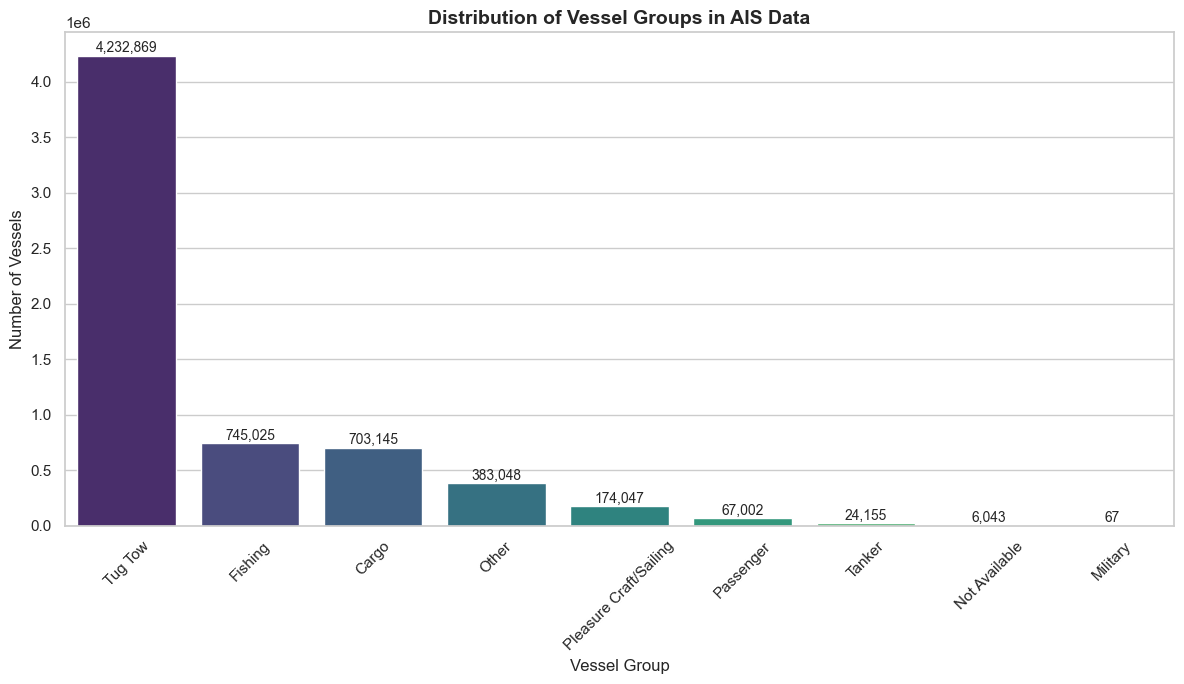

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Sort the distribution for better visualization
vessel_group_distribution = df['VesselGroup'].value_counts().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=vessel_group_distribution.index, y=vessel_group_distribution.values, palette="viridis")

# Add labels to each bar
for i, value in enumerate(vessel_group_distribution.values):
    plt.text(i, value + 5000, f'{value:,}', ha='center', va='bottom', fontsize=10)

# Plot enhancements
plt.xlabel('Vessel Group', fontsize=12)
plt.ylabel('Number of Vessels', fontsize=12)
plt.title('Distribution of Vessel Groups in AIS Data', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



Filtered Vessel Group Distribution (Excluding Tug Tow):


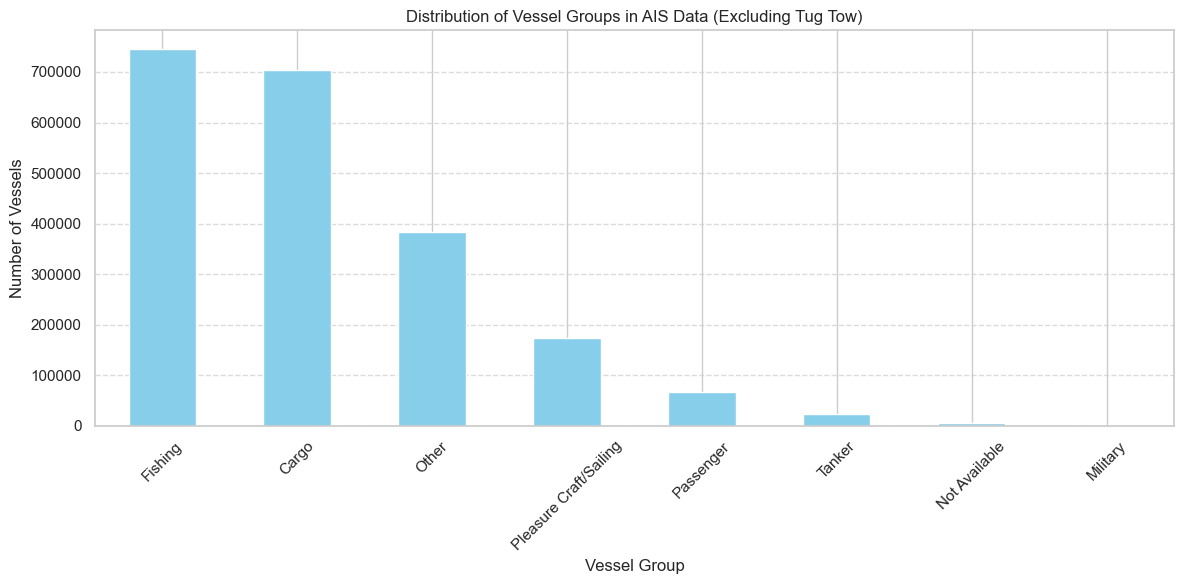

In [12]:
# Filter out 'Tug Tow' for focused analysis
filtered_df = df[df['VesselGroup'] != 'Tug Tow']

# Check the updated distribution
filtered_distribution = filtered_df['VesselGroup'].value_counts()
print("\nFiltered Vessel Group Distribution (Excluding Tug Tow):")
# print(filtered_distribution)

# Plot the updated distribution without 'Tug Tow'
plt.figure(figsize=(12, 6))
filtered_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Vessel Group')
plt.ylabel('Number of Vessels')
plt.title('Distribution of Vessel Groups in AIS Data (Excluding Tug Tow)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [13]:
# Handle VesselType (important for classification)
df['VesselType'] = df['VesselType'].fillna(-1)  # Special code for unknown

# Handle Status
df['Status'] = df['Status'].fillna(-1)  # Special code for unknown

# For physical characteristics, use median per vessel type
# First, group by vessel type and calculate medians (not using mean as it's heavily influenced by outliers and erroneous entries)
vessel_type_medians = df.groupby('VesselType').agg({
    'Length': 'median',
    'Width': 'median',
    'Draft': 'median'
}).to_dict()

print(vessel_type_medians)

{'Length': {-1.0: 229.0, 0.0: 0.0, 9.0: 199.0, 30.0: 41.0, 31.0: 28.0, 32.0: 15.0, 33.0: 8.0, 34.0: 10.0, 35.0: 7.0, 36.0: 0.0, 37.0: 13.0, 38.0: 0.0, 50.0: 11.0, 51.0: 14.0, 52.0: 23.0, 53.0: 13.0, 54.0: 11.0, 57.0: 139.0, 60.0: 27.0, 67.0: 10.0, 70.0: 200.0, 71.0: nan, 72.0: 224.0, 79.0: 229.0, 80.0: 169.0, 81.0: 159.0, 82.0: 175.0, 83.0: 195.0, 89.0: 183.0, 90.0: 74.0, 97.0: 13.0, 99.0: 21.0}, 'Width': {-1.0: 5.0, 0.0: 0.0, 9.0: 31.0, 30.0: 11.0, 31.0: 10.0, 32.0: 6.0, 33.0: 4.0, 34.0: 4.0, 35.0: 3.0, 36.0: 0.0, 37.0: 4.0, 38.0: 0.0, 50.0: nan, 51.0: 4.0, 52.0: 12.0, 53.0: 3.0, 54.0: 4.0, 57.0: 22.0, 60.0: 7.0, 67.0: 3.0, 70.0: 32.0, 71.0: nan, 72.0: 32.0, 79.0: 37.0, 80.0: 27.0, 81.0: 27.0, 82.0: 27.0, 83.0: 32.0, 89.0: 32.0, 90.0: 20.0, 97.0: 4.0, 99.0: 7.0}, 'Draft': {-1.0: 2.1, 0.0: 1.1, 9.0: 8.5, 30.0: 5.7, 31.0: 4.0, 32.0: 3.0, 33.0: nan, 34.0: nan, 35.0: nan, 36.0: 2.1, 37.0: 2.1, 38.0: nan, 50.0: nan, 51.0: nan, 52.0: 4.2, 53.0: 1.8, 54.0: 1.0, 57.0: 6.6, 60.0: 3.1, 67.0: 1.

In [14]:
# Then fill missing values based on vessel type
for characteristic in ['Length', 'Width', 'Draft']:
    df[characteristic] = df.apply(
        lambda x: vessel_type_medians[characteristic][x['VesselType']]
        if pd.isna(x[characteristic]) and not pd.isna(x['VesselType'])
        else x[characteristic],
        axis=1
    )

# Fill remaining missing values with overall medians
df['Length'] = df['Length'].fillna(df['Length'].median())
df['Width'] = df['Width'].fillna(df['Width'].median())
df['Draft'] = df['Draft'].fillna(df['Draft'].median())

# Handle Cargo
df['Cargo'] = df['Cargo'].fillna(-1)  # Special code for unknown

In [15]:
#Missing Value Analysis

for column in df.columns:
    missing_count = df[column].isna().sum()
    print(f"Missing {column}: {missing_count}")

Missing MMSI: 0
Missing BaseDateTime: 0
Missing LAT: 0
Missing LON: 0
Missing SOG: 0
Missing COG: 0
Missing Heading: 0
Missing VesselName: 0
Missing IMO: 1757791
Missing CallSign: 2010080
Missing VesselType: 0
Missing Status: 0
Missing Length: 0
Missing Width: 0
Missing Draft: 0
Missing Cargo: 0
Missing TransceiverClass: 0
Missing has_IMO: 0
Missing has_CallSign: 0
Missing VesselGroup: 0


In [16]:
df2 = df[df['VesselGroup'] != 'Tug Tow']

In [17]:
df2.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass,has_IMO,has_CallSign,VesselGroup
0,316048178,2022-07-31T00:19:15,49.29494,-123.01942,17.4,265.9,511.0,FASTNET,NaN,NaN,37.0,-1.0,7.0,2.0,2.1,-1.0,B,False,False,Pleasure Craft/Sailing
1,316048178,2022-07-31T00:20:31,49.29547,-123.02952,21.3,280.8,511.0,FASTNET,NaN,NaN,37.0,-1.0,7.0,2.0,2.1,-1.0,B,False,False,Pleasure Craft/Sailing
2,368234360,2022-07-31T01:22:16,49.29778,-123.06112,11.7,97.3,511.0,ONE SHOT,NaN,WDM7473,37.0,-1.0,27.0,7.0,2.1,-1.0,B,False,True,Pleasure Craft/Sailing
3,368234360,2022-07-31T01:23:17,49.29739,-123.05597,12.1,96.4,511.0,ONE SHOT,NaN,WDM7473,37.0,-1.0,27.0,7.0,2.1,-1.0,B,False,True,Pleasure Craft/Sailing
4,368234360,2022-07-31T01:24:18,49.29709,-123.05140,7.4,95.4,511.0,ONE SHOT,NaN,WDM7473,37.0,-1.0,27.0,7.0,2.1,-1.0,B,False,True,Pleasure Craft/Sailing


In [18]:
# Ensure BaseDateTime is in datetime format
df2['BaseDateTime'] = pd.to_datetime(df2['BaseDateTime'])

C:\Users\joyji\AppData\Local\Temp\ipykernel_5332\2009791990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BaseDateTime'] = pd.to_datetime(df2['BaseDateTime'])


In [19]:
df2.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass,has_IMO,has_CallSign,VesselGroup
0,316048178,2022-07-31 00:19:15,49.29494,-123.01942,17.4,265.9,511.0,FASTNET,NaN,NaN,37.0,-1.0,7.0,2.0,2.1,-1.0,B,False,False,Pleasure Craft/Sailing
1,316048178,2022-07-31 00:20:31,49.29547,-123.02952,21.3,280.8,511.0,FASTNET,NaN,NaN,37.0,-1.0,7.0,2.0,2.1,-1.0,B,False,False,Pleasure Craft/Sailing
2,368234360,2022-07-31 01:22:16,49.29778,-123.06112,11.7,97.3,511.0,ONE SHOT,NaN,WDM7473,37.0,-1.0,27.0,7.0,2.1,-1.0,B,False,True,Pleasure Craft/Sailing
3,368234360,2022-07-31 01:23:17,49.29739,-123.05597,12.1,96.4,511.0,ONE SHOT,NaN,WDM7473,37.0,-1.0,27.0,7.0,2.1,-1.0,B,False,True,Pleasure Craft/Sailing
4,368234360,2022-07-31 01:24:18,49.29709,-123.05140,7.4,95.4,511.0,ONE SHOT,NaN,WDM7473,37.0,-1.0,27.0,7.0,2.1,-1.0,B,False,True,Pleasure Craft/Sailing


In [20]:
# Extracting time-based features
df2['hour'] = df2['BaseDateTime'].dt.hour           # Hour of the day (0-23)
df2['day'] = df2['BaseDateTime'].dt.day             # Day of the month (1-31)
df2['month'] = df2['BaseDateTime'].dt.month         # Month (1-12)
df2['day_of_week'] = df2['BaseDateTime'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
df2['week'] = df2['BaseDateTime'].dt.isocalendar().week  # ISO week number (1-53)

# Display the updated DataFrame with new temporal features
df2.head()

C:\Users\joyji\AppData\Local\Temp\ipykernel_5332\1958873858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['hour'] = df2['BaseDateTime'].dt.hour           # Hour of the day (0-23)
C:\Users\joyji\AppData\Local\Temp\ipykernel_5332\1958873858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['day'] = df2['BaseDateTime'].dt.day             # Day of the month (1-31)
C:\Users\joyji\AppData\Local\Temp\ipykernel_5332\1958873858.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,...,Cargo,TransceiverClass,has_IMO,has_CallSign,VesselGroup,hour,day,month,day_of_week,week
0,316048178,2022-07-31 00:19:15,49.29494,-123.01942,17.4,265.9,511.0,FASTNET,NaN,NaN,...,-1.0,B,False,False,Pleasure Craft/Sailing,0,31,7,6,30
1,316048178,2022-07-31 00:20:31,49.29547,-123.02952,21.3,280.8,511.0,FASTNET,NaN,NaN,...,-1.0,B,False,False,Pleasure Craft/Sailing,0,31,7,6,30
2,368234360,2022-07-31 01:22:16,49.29778,-123.06112,11.7,97.3,511.0,ONE SHOT,NaN,WDM7473,...,-1.0,B,False,True,Pleasure Craft/Sailing,1,31,7,6,30
3,368234360,2022-07-31 01:23:17,49.29739,-123.05597,12.1,96.4,511.0,ONE SHOT,NaN,WDM7473,...,-1.0,B,False,True,Pleasure Craft/Sailing,1,31,7,6,30
4,368234360,2022-07-31 01:24:18,49.29709,-123.05140,7.4,95.4,511.0,ONE SHOT,NaN,WDM7473,...,-1.0,B,False,True,Pleasure Craft/Sailing,1,31,7,6,30


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2102532 entries, 0 to 6335376
Data columns (total 25 columns):
 #   Column            Dtype         
---  ------            -----         
 0   MMSI              int64         
 1   BaseDateTime      datetime64[ns]
 2   LAT               float64       
 3   LON               float64       
 4   SOG               float64       
 5   COG               float64       
 6   Heading           float64       
 7   VesselName        object        
 8   IMO               object        
 9   CallSign          object        
 10  VesselType        float64       
 11  Status            float64       
 12  Length            float64       
 13  Width             float64       
 14  Draft             float64       
 15  Cargo             float64       
 16  TransceiverClass  object        
 17  has_IMO           bool          
 18  has_CallSign      bool          
 19  VesselGroup       object        
 20  hour              int32         
 21  day          

In [22]:
# Check time span of the data
time_span = df2['BaseDateTime'].agg(['min', 'max'])
print("Data spans from:", time_span)

# Check average signals per vessel
signals_per_vessel = df2.groupby('MMSI').size().describe()
print("\nSignals per vessel statistics:", signals_per_vessel)


Data spans from: min   2022-07-31 00:00:02
max   2023-05-01 23:59:58
Name: BaseDateTime, dtype: datetime64[ns]

Signals per vessel statistics: count      1162.000000
mean       1809.407917
std       12884.041610
min           1.000000
25%          28.000000
50%         254.000000
75%        1067.000000
max      233159.000000
dtype: float64


In [23]:
# Sort the dataframe by MMSI and timestamp
df2 = df2.sort_values(['MMSI', 'BaseDateTime'])

In [24]:
# Now calculate transmission intervals
df2['transmission_interval'] = df2.groupby('MMSI')['BaseDateTime'].diff().dt.total_seconds()

# Get statistics
transmission_stats = df2['transmission_interval'].describe()
print("\nTransmission interval statistics (seconds):", transmission_stats)


Transmission interval statistics (seconds): count    2.101370e+06
mean     2.096695e+03
std      1.219963e+05
min      0.000000e+00
25%      7.000000e+01
50%      8.200000e+01
75%      1.800000e+02
max      2.350078e+07
Name: transmission_interval, dtype: float64


In [25]:
# 2. Check for missing dates in the time series
daily_counts = df2.resample('D', on='BaseDateTime').size()
missing_days = daily_counts[daily_counts == 0]

print(f"\n🚨 Number of missing days: {missing_days.size}")
if missing_days.size > 0:
    print("Missing days:\n", missing_days.index.tolist())
else:
    print("✅ No missing days detected.")


🚨 Number of missing days: 0
✅ No missing days detected.


In [26]:
# Save the cleaned and preprocessed DataFrame to a CSV file
df2.to_csv('cleaned_AIS_data.csv', index=False)

print("✅ Cleaned data has been saved to 'cleaned_AIS_data.csv'")


✅ Cleaned data has been saved to 'cleaned_AIS_data.csv'


### ML 

In [27]:
# Check for missing values in selected features

# Numerical Features
numerical_features = ['SOG', 'COG', 'Heading', 'Length', 'Width', 'Draft']

# Categorical Feature
categorical_features = ['VesselGroup']

# Temporal Features
temporal_features = ['hour', 'day_of_week', 'month']

# Combine all features
all_features = numerical_features + categorical_features + temporal_features

# Print missing values for each feature
for feature in all_features:
    missing_count = df2[feature].isna().sum()
    print(f"Missing values in {feature}: {missing_count}")


Missing values in SOG: 0
Missing values in COG: 0
Missing values in Heading: 0
Missing values in Length: 0
Missing values in Width: 0
Missing values in Draft: 0
Missing values in VesselGroup: 0
Missing values in hour: 0
Missing values in day_of_week: 0
Missing values in month: 0


In [ ]:
# Import necessary libraries
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Data Preparation

# Select relevant features for prediction
features = ['SOG', 'COG', 'Heading', 'Length', 'Width', 'Draft', 'hour', 'day_of_week', 'month']
target = 'SOG'  # Predicting Speed Over Ground

# Prepare feature matrix and target variable
X = df2[features]
y = df2[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80/20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2️⃣ Model Training with SVR

# Initialize SVR model
svr_model = SVR(kernel='rbf', gamma='scale', C=1000, epsilon=0.5)

# Train the SVR model
svr_model.fit(X_train, y_train)

# 3️⃣ Prediction and Error Calculation

# Predict on test data
y_pred = svr_model.predict(X_test)

# Calculate prediction errors
errors = np.abs(y_test - y_pred)

# Define anomaly threshold (mean + 2*std)
threshold = np.mean(errors) + 2 * np.std(errors)

# Flag anomalies
anomalies = errors > threshold

print(f"🚨 Number of anomalies detected: {np.sum(anomalies)}")

# 4️⃣ Visualization: Actual vs Predicted with Anomalies

plt.figure(figsize=(12, 7))

# Plot normal predictions
plt.scatter(y_test[~anomalies], y_pred[~anomalies], color='blue', alpha=0.4, label='Normal Behavior')

# Plot detected anomalies
plt.scatter(y_test[anomalies], y_pred[anomalies], color='red', edgecolor='black', label='Detected Anomalies')

# Plot Styling
plt.xlabel('Actual SOG')
plt.ylabel('Predicted SOG')
plt.title('🚨 SVR-Based Anomaly Detection: Actual vs Predicted SOG')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()
